### Creating A Stacked Bar Chart

This example shows how to create a stacked chart with information about crime type in each bar. This visualization can plot 2 variables in a single plot.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

We have 12 different CSV files containing crime data for each month of 2020. We download each of them to the data folder.

In [ ]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/crime/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)


#### Data Pre-Processing

It will be helpful to merge all 12 CSV files into a single dataframe. We can use `pd.concat()` to merge a list of dataframes.

In [ ]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

In [ ]:
counts_by_type = merged_df.groupby(['Month', 'Crime type']).size()
counts_by_type

The result is not in a suitable format for plotting. We call `unstack()` to create a dataframe. 

In [ ]:
counts_df = counts_by_type.unstack()
counts_df

#### Creating a Chart

Now we can create the stacked bar chart. Instead of the default legend, we create a horizontal legend with a frame using the `legend()` function.

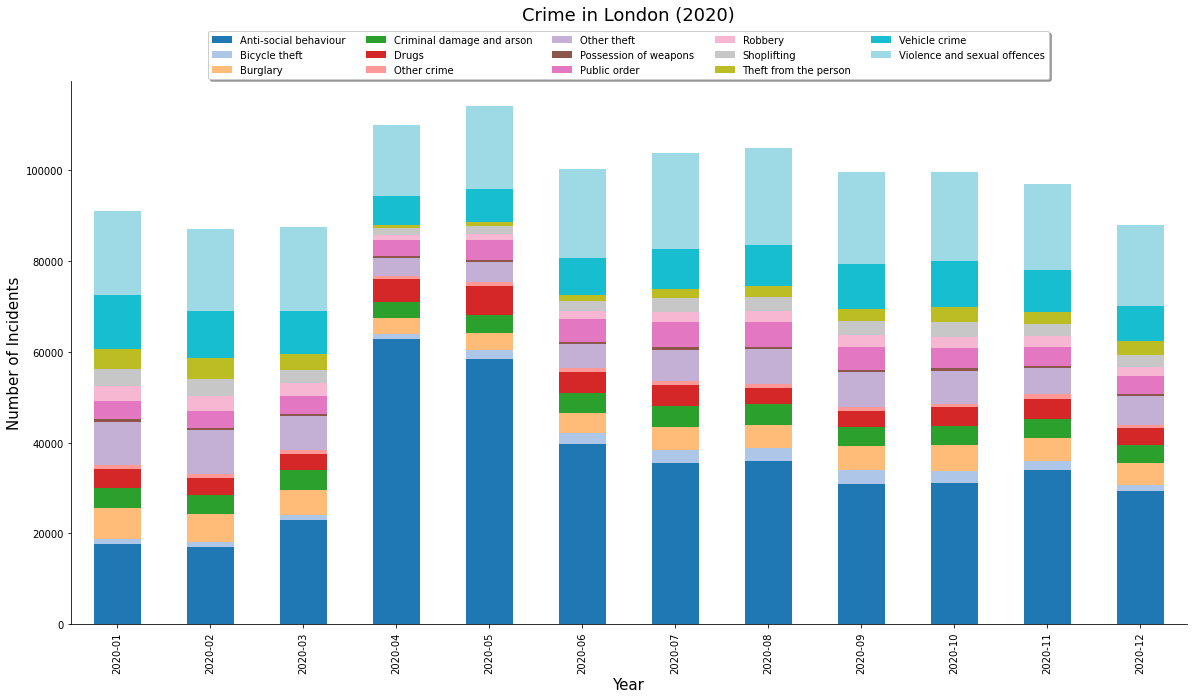

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
counts_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
plt.legend(loc='upper center', ncol=5, frameon=True, bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Year', size = 15)
plt.ylabel('Number of Incidents', size = 15)
plt.title('Crime in London (2020)', size = 18, y=1.1)
output_folder = 'output'
output_path = os.path.join(output_folder, 'stacked_chart.jpg')
plt.savefig(output_path)
plt.show()